# Place Cell Ratio

In [1]:
from typing import Tuple

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from param import *
from util import get_place_cell

output_dir = ParamDir().OUTPUT_ROOT/ "data_exploration/"

In [2]:
def get_place_cell_ratio(data_name):
    # print(data_name)
    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)

    # with open(ParamDir().OUTPUT_ROOT/"time_series_classification"/"rocket_permutation_test_results.pickle","rb") as f:
    #     p_results = pickle.load(f)
    # WT_count = p_results["WT"]
    # KO_count = p_results["KO"]

    pc_beh_id, pc_event_id = get_place_cell(results_all, 0.01)
    # print(f"behavior shuffled method PC ratio: {len(pc_beh_id)/len(results_all['original MI']) :.2f}")
    # if "KO" in data_name:
    #     r = [i for i in KO_count["P-values/Score"] if data_name in i[2]]
    #     print(f"permutation results: \n {r}")
    # else:
    #     r = [i for i in WT_count["P-values/Score"] if data_name in i[2]]
    #     print(f"permutation results: \n {r}")
    return len(pc_beh_id)/len(results_all['original MI'])

Text(0.5, 0, 'permutation test')

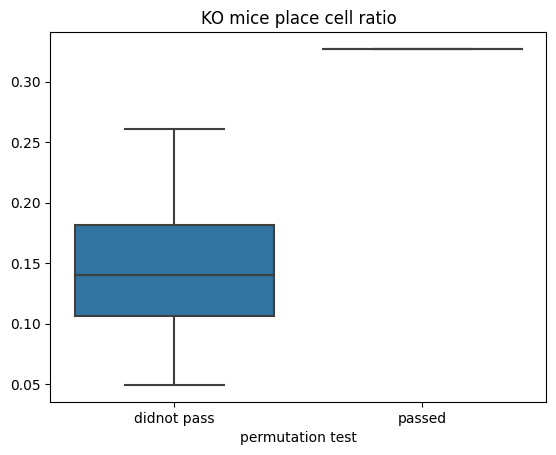

In [3]:
KO_names = ["091317 OF CaMKII HKO M19-n1"] # mice that passed the test
pass_res = []
not_pass_res = []
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in str(data_dir).split('/')[-1]]
for data_dir in KO_data_list:
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if data_name not in KO_names:
        not_pass_res.append([ratio, data_name])
    else:
        pass_res.append([ratio, data_name])
fig, ax = plt.subplots()
sns.boxplot([[i[0] for i in not_pass_res], [i[0] for i in pass_res]], ax=ax)
ax.set_xticklabels(["didnot pass", "passed"])
plt.title("KO mice place cell ratio")
plt.xlabel("permutation test")

In [4]:
print(f"passed: \n {pass_res} \ndidnot pass: \n {not_pass_res}")

passed: 
 [[0.3269230769230769, '091317 OF CaMKII HKO M19-n1']] 
didnot pass: 
 [[0.15517241379310345, '092217 OF CaMKII HKO M30-n1'], [0.04938271604938271, '091317 OF CaMKII HKO M20-n1'], [0.125, 'CK_KO_RN1_OF'], [0.2608695652173913, '090817 OF CaMKII HKO M22-n1']]


## WT

Text(0.5, 0, 'permutation test')

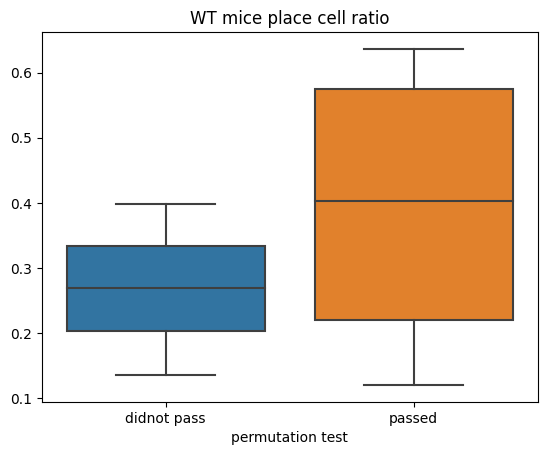

In [5]:
WT_names = ["M45_042718_OF", "M46_042718_OF", "092217 OF CaMKII WT M29-n1"] # mice that didn't pass the test
pass_res = []
not_pass_res = []
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in str(data_dir).split('/')[-1]]
for data_dir in WT_data_list:
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if data_name in WT_names:
        not_pass_res.append([ratio, data_name])
    else:
        pass_res.append([ratio, data_name])
fig, ax = plt.subplots()
sns.boxplot([[i[0] for i in not_pass_res], [i[0] for i in pass_res]], ax=ax)
ax.set_xticklabels(["didnot pass", "passed"])
plt.title("WT mice place cell ratio")
plt.xlabel("permutation test")

In [6]:
print(f"passed: \n {pass_res} \ndidnot pass: \n {not_pass_res}")

passed: 
 [[0.1206896551724138, 'CK_WT_RN3_OF'], [0.6363636363636364, 'M44_042718_OF'], [0.25316455696202533, '092717 OF SERT WT M32-n1'], [0.5535714285714286, '081117 OF B6J M27-n1']] 
didnot pass: 
 [[0.13636363636363635, 'M45_042718_OF'], [0.3977272727272727, 'M46_042718_OF'], [0.2698412698412698, '092217 OF CaMKII WT M29-n1']]
